In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('train.csv')

# Limpieza de datos

# Análisis Univariado

## Variables cuantitativas

In [33]:
numeric_cols = ['Age', 'SibSp', 'Parch', 'Fare']

In [34]:
from scipy.stats import skew, kurtosis, shapiro

def plot_numeric_distributions(data, numeric_cols):  
    cols_per_row = 2
    n = len(numeric_cols)
    rows = -(-n // cols_per_row)  

    plt.figure(figsize=(cols_per_row * 7, rows * 4))

    for idx, col in enumerate(numeric_cols, 1):
        sk = skew(data[col].dropna())
        kt = kurtosis(data[col].dropna())
        _, p = shapiro(data[col].dropna())

        plt.subplot(rows, cols_per_row*2, idx*2-1)
        sns.histplot(data[col], kde=True, bins=20, color="skyblue")
        plt.title(f"{col}\nSkew: {sk:.2f}, Kurt: {kt:.2f}, p={p:.2g}")

        plt.subplot(rows, cols_per_row*2, idx*2)
        sns.boxplot(y=data[col], color="lightcoral")
        plt.title(f"{col} - Boxplot")

    plt.tight_layout()
    plt.show()

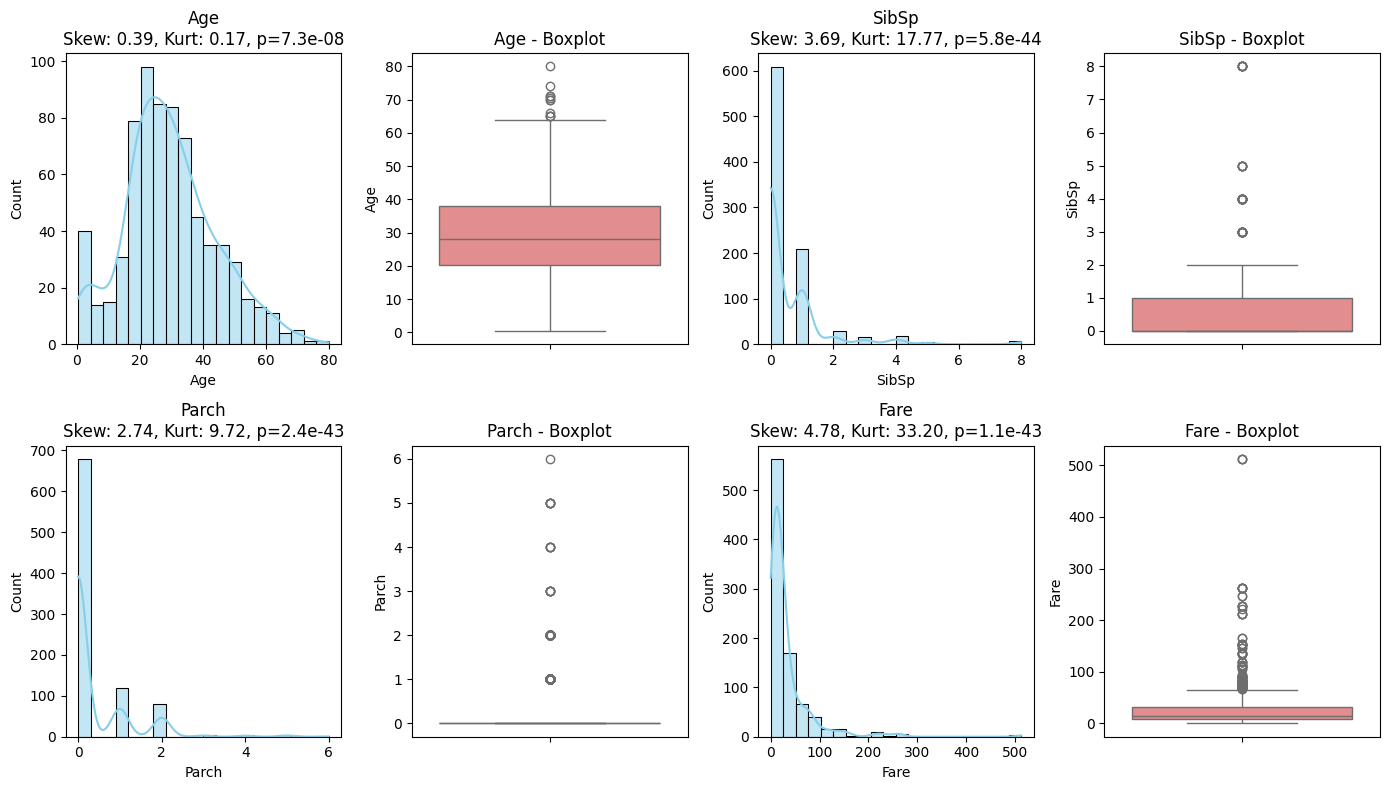

In [35]:
plot_numeric_distributions(data, numeric_cols)

Como primeras observaciones para las variables cuantitativa continuas Age y Fare podemos observar asimetría
positiva en ambos casos, es decir las edades se suelen concentrar en valores
bajos, esto es visualmente claro en el histograma de Fare. Por otro lado, Age
presenta una kurtosis baja mientras que Fare tiene una muy alta. La alta Kurtosis de fare también se puede observar en su boxplot puesto que hay una alta
cantidad de outliers encima del límite superior.

En humano, las tarifas de los pasajeros tienen un sesgo hacia los valores más bajos, por lo que tarifas con precios elevados son raras. Respecto a la edad, esta tiene un ligero sesgo hacia los valores bajos y edades mayores a 65 son atípicas.

## Variables cualitativas

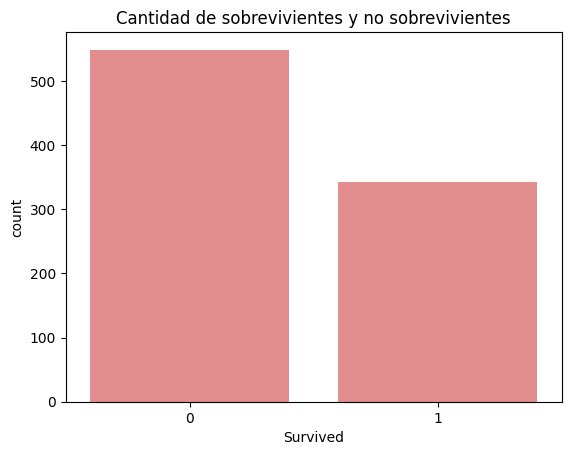

In [42]:
sns.countplot(x='Survived', data=data,color='lightcoral')
plt.title('Cantidad de sobrevivientes y no sobrevivientes')
plt.show()

Observamos que la cantidad de no supervivientes es mayor a la de supervivientes y está un poco desbalanceada

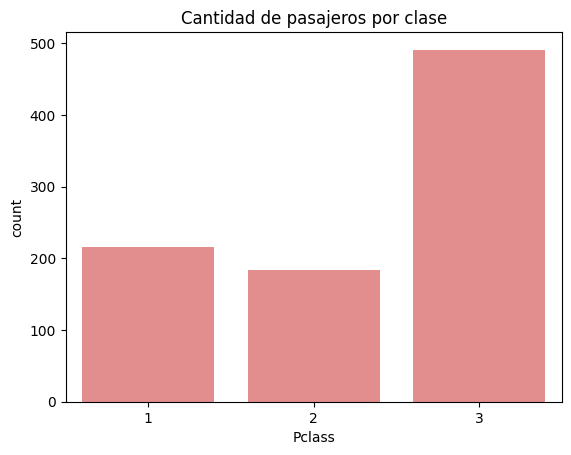

In [45]:
sns.countplot(x='Pclass', data=data, color='lightcoral')
plt.title('Cantidad de pasajeros por clase')
plt.show()

Observamos que la cantidad de pasajeros en tercera clase es mayor.

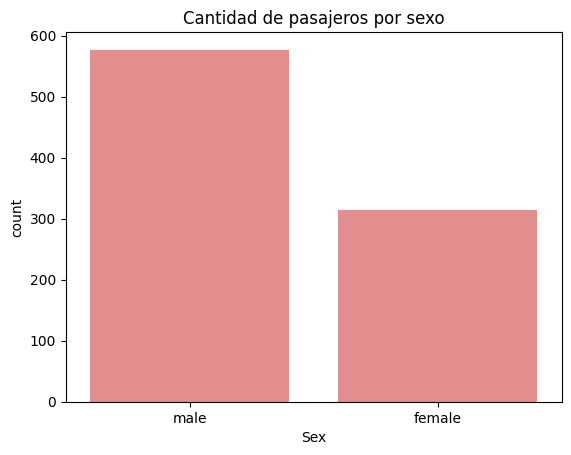

In [47]:
sns.countplot(x='Sex', data=data, color='lightcoral')
plt.title('Cantidad de pasajeros por sexo')
plt.show()

In [52]:
men = len(data[data['Sex']=='male'])/len(data)
women = len(data[data['Sex']=='female'])/len(data)
print(men,women)

0.6475869809203143 0.35241301907968575


Observamos que la cantidad de pasajeros hombres es mayor a la de las mujeres, el 64% son hombres y el 35% mujeres

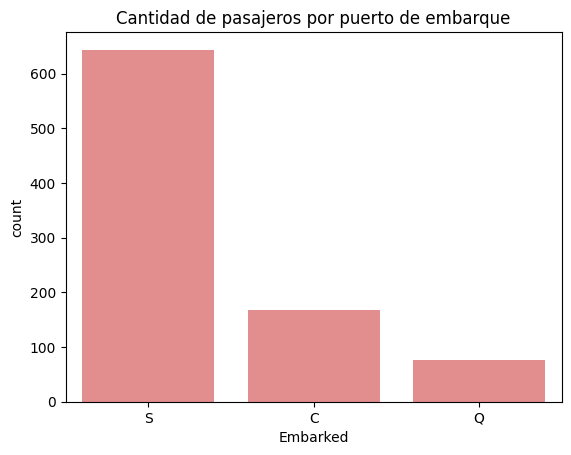

In [54]:
sns.countplot(x='Embarked', data=data, color='lightcoral')
plt.title('Cantidad de pasajeros por puerto de embarque')
plt.show()

La cantidad de pasajeros provenientes del puerto S es bastante mayor a los que provienen del puerto C y Q respectivamente

# Análisis Multivariado